## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [ ]:
def coefplot(results, subject):
    '''
    Takes in results of OLS model and returns a plot of
    the coefficients with 95% confidence intervals.

    Removes intercept, so if uncentered will return error.
    '''
    # Create dataframe of results summary
    coef_df = pd.DataFrame(results.summary().tables[1].data)

    # Add column names
    coef_df.columns = coef_df.iloc[0]

    # Drop the extra row with column labels
    coef_df=coef_df.drop(0)

    # Set index to variable names
    coef_df = coef_df.set_index(coef_df.columns[0])

    # Change datatype from object to float
    coef_df = coef_df.astype(float)

    # Get errors; (coef - lower bound of conf interval)
    errors = coef_df['coef'] - coef_df['[0.025']

    # Append errors column to dataframe
    coef_df['errors'] = errors

    # Drop the constant for plotting
    coef_df = coef_df.drop(['Intercept'])

    # Sort values by coef ascending
    #coef_df = coef_df.sort_values(by=['coef'])

    ### Plot Coefficients ###

    # x-labels
    variables = list(coef_df.index.values)

    # Add variables column to dataframe
    coef_df['variables'] = variables

    # Set sns plot style back to 'poster'
    # This will make bars wide on plot
    sns.set_context("poster")

    # Define figure, axes, and plot
    fig, ax = plt.subplots(figsize=(15, 10))

    # Error bars for 95% confidence interval
    # Can increase capsize to add whiskers
    coef_df.plot(x='variables', y='coef', kind='barh',
                 ax=ax, color='none', fontsize=22,
                 ecolor='steelblue',capsize=0,
                 xerr='errors', legend=False)

    # Set title & labels
    plt.title('Coefficients for '+subject+' model w/ 95% CIs',fontsize=30)
    ax.set_ylabel('Coefficients',fontsize=22)
    ax.set_xlabel('',fontsize=22)

    # Coefficients
    ax.scatter(y=np.arange(coef_df.shape[0]),
               marker='o', s=80,
               x=coef_df['coef'], color='steelblue')

    # Line to define zero on the y-axis
    ax.axvline(x=0, linestyle='--', color='red', linewidth=1)

    plt.tight_layout()
    plt.savefig(subject+"_coefplot.pdf")

    return None

In [ ]:
def metrics(mod):
  return np.round(mod.aic), np.round(mod.llf), np.round(mod.rsquared, 3), np.round(np.mean(np.abs(data_train[depvar] - mod.fittedvalues)), 3), np.round(mod.fvalue)

## Reading in data

In [ ]:
draftpickadata = pd.read_csv("https://github.com/nflverse/nflverse-data/releases/download/draft_picks/draft_picks.csv")


In [ ]:
draftpickadata

,season,round,pick,team,gsis_id,pfr_player_id,cfb_player_id,pfr_player_name,hof,position,...,pass_ints,rush_atts,rush_yards,rush_tds,receptions,rec_yards,rec_tds,def_solo_tackles,def_ints,def_sacks
0,1980,1,1,DET,NaN,SimsBi00,billy-sims-1,Billy Sims,False,RB,...,0.0,1131.0,5106.0,42.0,186.0,2072.0,5.0,NaN,NaN,NaN
1,1980,1,2,NYJ,NaN,JoneLa00,lam-jones-1,Lam Jones,False,WR,...,0.0,9.0,17.0,0.0,138.0,2322.0,13.0,NaN,NaN,NaN
2,1980,1,3,CIN,NaN,MunoAn00,NaN,Anthony Munoz,True,T,...,0.0,0.0,0.0,0.0,7.0,18.0,4.0,NaN,NaN,NaN
3,1980,1,4,GNB,NaN,ClarBr23,bruce-clark-1,Bruce Clark,False,DE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,39.5
4,1980,1,5,BAL,NaN,DickCu00,curtis-dickey-1,Curtis Dickey,False,RB,...,0.0,937.0,4019.0,32.0,134.0,1577.0,8.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12151,2023,7,255,SFO,00-0038648,GrahJa02,jalen-graham-1,Jalen Graham,False,S,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
12152,2023,7,256,GNB,NaN,DuboGr00,grant-dubose-1,Grant Dubose,False,WR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12153,2023,7,257,DEN,NaN,ForsAl00,alex-forsyth-1,Alex Forsyth,False,OL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12154,2023,7,258,CHI,NaN,WillKe07,kendall-williamson-1,Kendall Williamson,False,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
draftpickadata = draftpickadata [draftpickadata['season']>=1997]

## Data Analysis (skip)

In [ ]:
draftpickadata.columns


Index(['season', 'round', 'pick', 'team', 'gsis_id', 'pfr_player_id',
       'cfb_player_id', 'pfr_player_name', 'hof', 'position', 'category',
       'side', 'college', 'age', 'to', 'allpro', 'probowls', 'seasons_started',
       'w_av', 'car_av', 'dr_av', 'games', 'pass_completions', 'pass_attempts',
       'pass_yards', 'pass_tds', 'pass_ints', 'rush_atts', 'rush_yards',
       'rush_tds', 'receptions', 'rec_yards', 'rec_tds', 'def_solo_tackles',
       'def_ints', 'def_sacks'],
      dtype='object')

In [ ]:
draftpickadata

,season,round,pick,team,gsis_id,pfr_player_id,cfb_player_id,pfr_player_name,hof,position,...,pass_ints,rush_atts,rush_yards,rush_tds,receptions,rec_yards,rec_tds,def_solo_tackles,def_ints,def_sacks
5292,1997,1,1,STL,NaN,PaceOr00,orlando-pace-1,Orlando Pace,True,T,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
5293,1997,1,2,OAK,NaN,RussDa00,NaN,Darrell Russell,False,DT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187.0,1.0,28.5
5294,1997,1,3,SEA,NaN,SpriSh00,shawn-springs-1,Shawn Springs,False,DB,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,631.0,33.0,8.5
5295,1997,1,4,BAL,NaN,BoulPe00,peter-boulware-1,Peter Boulware,False,LB,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,293.0,1.0,70.0
5296,1997,1,5,DET,NaN,WestBr20,bryant-westbrook-1,Bryant Westbrook,False,DB,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,198.0,13.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12151,2023,7,255,SFO,00-0038648,GrahJa02,jalen-graham-1,Jalen Graham,False,S,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
12152,2023,7,256,GNB,NaN,DuboGr00,grant-dubose-1,Grant Dubose,False,WR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12153,2023,7,257,DEN,NaN,ForsAl00,alex-forsyth-1,Alex Forsyth,False,OL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12154,2023,7,258,CHI,NaN,WillKe07,kendall-williamson-1,Kendall Williamson,False,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
draftpickadata[['round', 'probowls']]

,round,probowls
5292,1,7
5293,1,2
5294,1,1
5295,1,4
5296,1,0
...,...,...
12151,7,0
12152,7,0
12153,7,0
12154,7,0


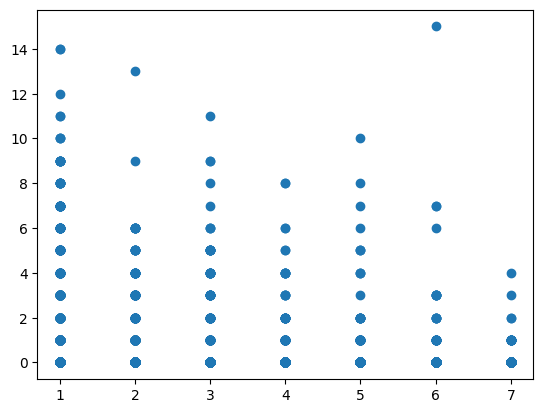

In [ ]:
plt.scatter(draftpickadata['round'], draftpickadata['probowls']);

In [ ]:
draftpickadata[ draftpickadata['probowls']==14]

,season,round,pick,team,gsis_id,pfr_player_id,cfb_player_id,pfr_player_name,hof,position,...,pass_ints,rush_atts,rush_yards,rush_tds,receptions,rec_yards,rec_tds,def_solo_tackles,def_ints,def_sacks
5304,1997,1,13,KAN,00-0006101,GonzTo00,tony-gonzalez-2,Tony Gonzalez,True,TE,...,0.0,2.0,14.0,0.0,1325.0,15127.0,111.0,NaN,NaN,NaN
5532,1998,1,1,IND,00-0010346,MannPe00,peyton-manning-1,Peyton Manning,True,QB,...,251.0,431.0,667.0,18.0,1.0,-2.0,0.0,NaN,NaN,NaN


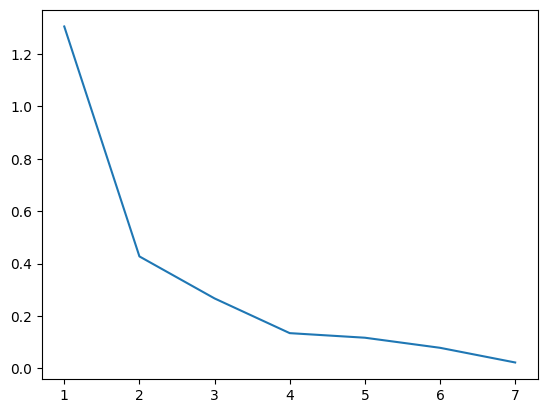

In [ ]:
temp = draftpickadata.groupby(by="round", as_index=False).agg({"probowls":"mean"})
plt.plot(temp['round'], temp['probowls']);

In [ ]:
draftpickadata.corr()['probowls']

<ipython-input-46-510fff192961>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  draftpickadata.corr()['probowls']


season             -0.065498
round              -0.279069
pick               -0.280400
hof                 0.385796
age                -0.141254
to                  0.127326
allpro              0.742424
probowls            1.000000
seasons_started     0.585970
w_av                0.709172
car_av                   NaN
dr_av               0.705732
games               0.493941
pass_completions    0.282134
pass_attempts       0.276627
pass_yards          0.284978
pass_tds            0.302909
pass_ints           0.244982
rush_atts           0.192041
rush_yards          0.191120
rush_tds            0.216035
receptions          0.299021
rec_yards           0.293389
rec_tds             0.289211
def_solo_tackles    0.341619
def_ints            0.419302
def_sacks           0.546430
Name: probowls, dtype: float64

## Other stuff (skip)

In [ ]:
avg_per_year = draftpickadata.groupby(by=["team", "season"], as_index=False).agg({'pass_yards' : "sum"}).sort_values(by="pass_yards", ascending=False)
avg_per_year = avg_per_year.groupby(by=["team"], as_index=False).agg({'pass_yards' : "mean"}).sort_values(by="pass_yards", ascending=False)

In [ ]:
avg_per_year

,team,pass_yards
28,SDG,7189.900000
22,NWE,5459.703704
11,GNB,4663.407407
1,ATL,4286.777778
6,CIN,3824.370370
17,LAR,3803.625000
26,PHI,3711.814815
13,IND,3686.925926
2,BAL,3603.777778
10,DET,3406.111111


In [ ]:
DAL = draftpickadata[ draftpickadata['team'] == "DAL"]

In [ ]:
DAL

,season,round,pick,team,gsis_id,pfr_player_id,cfb_player_id,pfr_player_name,hof,position,...,pass_ints,rush_atts,rush_yards,rush_tds,receptions,rec_yards,rec_tds,def_solo_tackles,def_ints,def_sacks
5313,1997,1,22,DAL,NaN,LaFlDa00,david-lafleur-1,David LaFleur,False,TE,...,0.0,0.0,0.0,0.0,85.0,729.0,12.0,NaN,NaN,NaN
5356,1997,3,65,DAL,NaN,CoakDe00,NaN,Dexter Coakley,False,LB,...,0.0,2.0,59.0,0.0,0.0,0.0,0.0,630.0,13.0,9.5
5374,1997,3,83,DAL,NaN,ScifSt20,NaN,Steve Scifres,False,G,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
5385,1997,3,94,DAL,NaN,WheaKe20,kenny-wheaton-1,Kenny Wheaton,False,DB,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,1.0,NaN
5392,1997,4,101,DAL,NaN,AndeAn22,NaN,Antonio Anderson,False,DT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12025,2023,4,129,DAL,00-0038575,FehoVi00,junior-fehoko-1,Viliami Fehoko,False,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12065,2023,5,169,DAL,NaN,RichAs00,asim-richards-1,Asim Richards,False,OL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
12074,2023,6,178,DAL,00-0038604,ScotEr00,eric-scott-jr-1,Eric Scott,False,DB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12108,2023,6,212,DAL,00-0038622,VaugDe00,deuce-vaughn-1,Deuce Vaughn,False,RB,...,0.0,23.0,40.0,0.0,7.0,40.0,0.0,NaN,NaN,NaN


In [ ]:
DAL.groupby(by="season", as_index=False).agg({"team":"count"})

,season,team
0,1997,9
1,1998,9
2,1999,8
3,2000,5
4,2001,9
5,2002,9
6,2003,7
7,2004,8
8,2005,8
9,2006,8


In [ ]:
DAL [ DAL['season'] ==1997]['pass_yards']

5313    0.0
5356    0.0
5374    0.0
5385    0.0
5392    0.0
5418    0.0
5420    0.0
5478    NaN
5515    0.0
Name: pass_yards, dtype: float64

Text(0, 0.5, 'Number of Passing Yards')

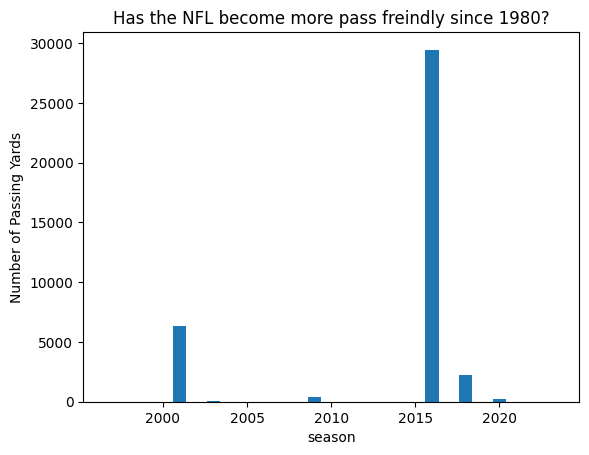

In [ ]:
plt.bar(x=DAL['season'], height=DAL['pass_yards'])
plt.title("Has the NFL become more pass freindly since 1980?")
plt.xlabel("season")
plt.ylabel("Number of Passing Yards")

In [ ]:
pass_yards = DAL.columns.get_loc('pass_yards')

In [ ]:
pass_yards

24

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
newpb_data = pd.read_csv("https://github.com/nflverse/nflverse-data/releases/download/draft_picks/draft_picks.csv")

In [ ]:
newpb_data.columns

Index(['season', 'round', 'pick', 'team', 'gsis_id', 'pfr_player_id',
       'cfb_player_id', 'pfr_player_name', 'hof', 'position', 'category',
       'side', 'college', 'age', 'to', 'allpro', 'probowls', 'seasons_started',
       'w_av', 'car_av', 'dr_av', 'games', 'pass_completions', 'pass_attempts',
       'pass_yards', 'pass_tds', 'pass_ints', 'rush_atts', 'rush_yards',
       'rush_tds', 'receptions', 'rec_yards', 'rec_tds', 'def_solo_tackles',
       'def_ints', 'def_sacks'],
      dtype='object')

In [ ]:
newpb_data.groupby(by="probowls", as_index=False).agg({"team" : "count"}).head(40)

,probowls,team
0,0,10889
1,1,501
2,2,251
3,3,173
4,4,99
5,5,86
6,6,51
7,7,34
8,8,23
9,9,19


## Prospect Data

In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#filepath = '/content/gdrive/MyDrive/Rishabh Raman'
filepath = '/content/gdrive/MyDrive/InspiritAI/Students/Rishabh Raman'
os.chdir(filepath)

FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/InspiritAI/Students/Rishabh Raman'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
draft_prospects = pd.read_csv("nfl_draft_prospects.csv")

In [ ]:
draft_prospects = draft_prospects.dropna(subset=["grade"])

In [ ]:
draft_profiles = pd.read_csv("nfl_draft_profiles.csv")

In [ ]:
master = draft_prospects.merge(draftpickadata, left_on=['draft_year', 'player_name'], right_on=['season', 'pfr_player_name'])

In [ ]:
master.corr()['probowls']

In [ ]:
master.columns

In [ ]:
np.unique(master['position_x'].fillna(""))

## ML for predicting number of pro bowls

In [ ]:
def simplify_position(position):
  if position == 'Center': return "O_line"
  if position == 'Cornerback': return "Secondary"
  if position == 'Defensive Back': return "Secondary"
  if position == 'Defensive End' : return "D_line"
  if position == 'Defensive Tackle': return "D_line"
  if position == 'Fullback' : return position
  if position == 'Inside Linebacker': return "Linebacker"
  if position == 'Kick Returner': return "Special_Teams"
  if position == 'Linebacker': return "Linebacker"
  if position == 'Long Snapper': return "Special_Teams"
  if position == 'Offensive Guard' : return "O_line"
  if position == 'Offensive Tackle': return "O_line"
  if position == 'Outside Linebacker': return "Linebacker"
  if position == 'Place Kicker': return "Special_Teams"
  if position == 'Punter' : return "Special_Teams"
  if position == 'Quarterback': return position
  if position == 'Running Back': return position
  if position == 'Safety': return "Secondary"
  if position == 'Tight End': return "Catcher"
  if position == 'Wide Receiver': return "Catcher"
  return "AA_Other"

In [ ]:
master['position'] = master['position_x'].apply(simplify_position)

NameError: name 'master' is not defined

In [ ]:
#features = ['C(position)', 'weight', 'height', 'age', 'pos_rk', 'ovr_rk']
features = ['C(position)', 'age', 'ovr_rk']
#features = ['weight', 'height', 'age', 'pos_rk', 'ovr_rk']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_train, data_test = train_test_split(master, test_size=0.2, random_state=1)

In [ ]:
depvar = "probowls"
mod1 = smf.ols(formula=depvar + ' ~ ' + "+".join(features), data=data_train)
mod1 = mod1.fit()

In [ ]:
metrics(mod1)

(8572.0, -4279.0, 0.086, 0.644, 43.0)

In [ ]:
metrics(mod1)

(8571.0, -4277.0, 0.088, 0.643, 33.0)

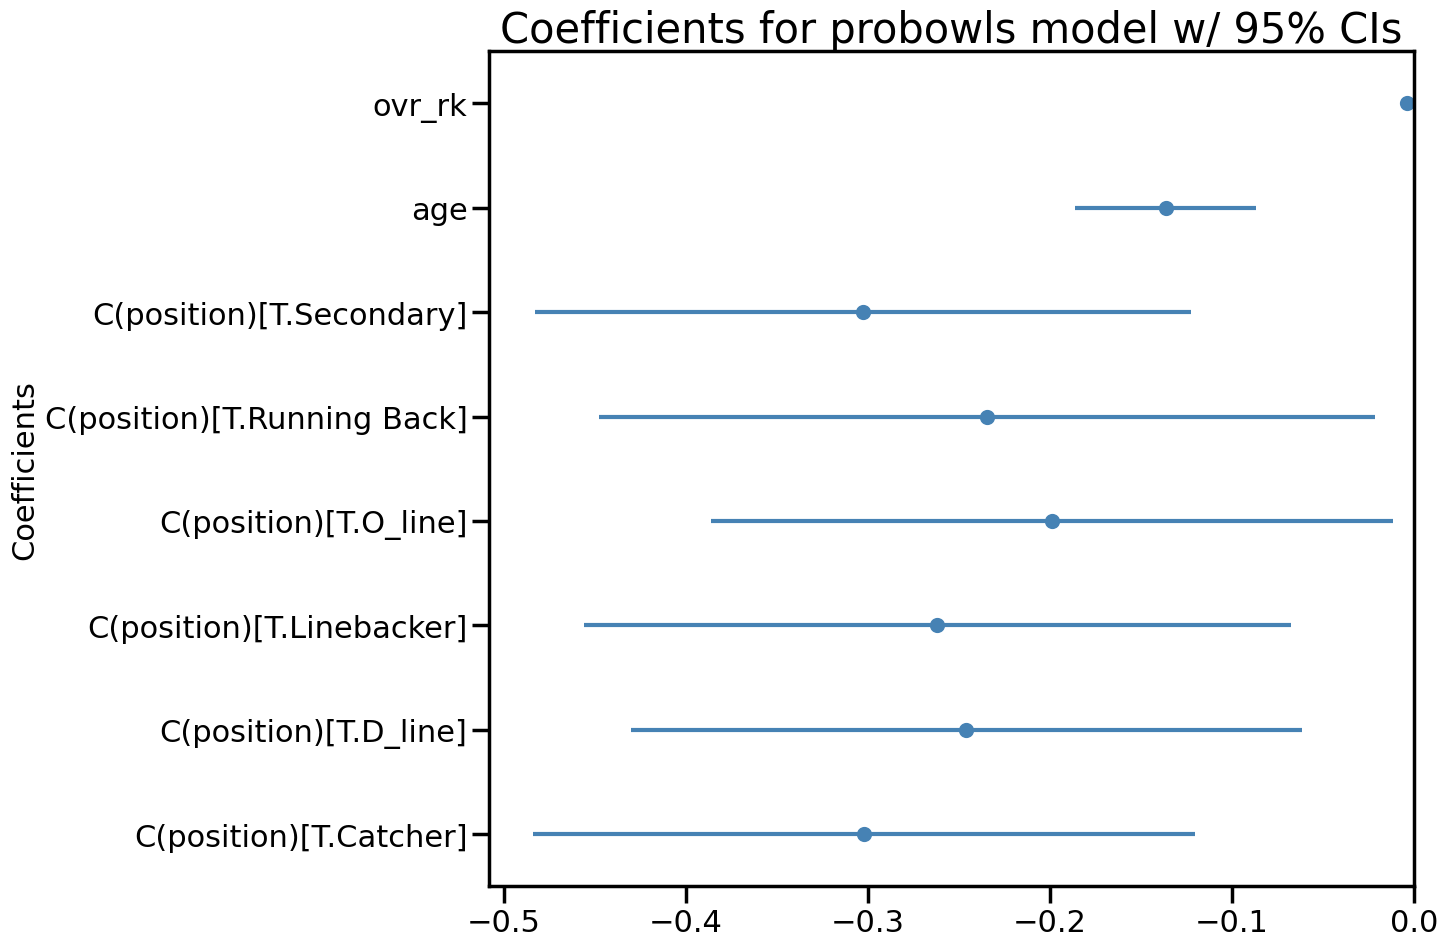

In [ ]:
coefplot(mod1, depvar)

In [ ]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               probowls   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     32.99
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           5.82e-50
Time:                        21:47:17   Log-Likelihood:                -4276.6
No. Observations:                2741   AIC:                             8571.
Df Residuals:                    2732   BIC:                             8624.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       4.1129      0.571      7.198      0.000       2.992       5.233
C(position)[T.Catcher]         -0.3022      0.093     -3.251      0.001      -0.484      -0.120
C(position)[T.D_line]          -0.2458      0.094     -2.622      0.009      -0.430      -0.062
C(position)[T.Linebacker]      -0.2618      0.099     -2.646      0.008      -0.456      -0.068
C(position)[T.O_line]          -0.1988      0.096     -2.082      0.037      -0.386      -0.012
C(position)[T.Running Back]    -0.2348      0.109     -2.161      0.031      -0.448      -0.022
C(position)[T.Secondary]       -0.3026      0.092     -3.287      0.001      -0.483      -0.122
age                            -0.1364      0.025     -5.397      0.000      -0.186      -0.087
ovr_rk                         -0.0037      0.000    -13.223      0.000      -0.004      -0.003
==============================================================================
Omnibus:                     2264.021   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52284.218
Skew:                           3.900   Prob(JB):                         0.00
Kurtosis:                      22.924   Cond. No.                     3.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

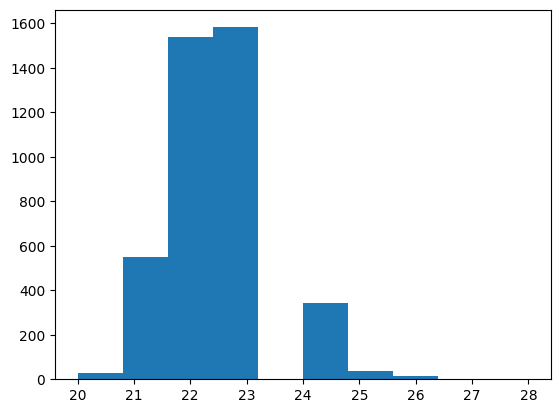

In [ ]:
plt.hist(master['age']);